# Arbres Binaires de Recherche (ABR)

In [1]:
%load_ext autoreload
%autoreload 2

---
## Exercice 1

Une bibliothèque imaginaire contient énormément de livres. Ceux-ci sont répartis dans 17576 salles, reliées les unes au autres par des portes. Chaque salle contient une porte d'entrée et, éventuellement, jusqu'à deux portes de sortie vers deux autres salles.

Pour retrouver facilement l'emplacement d'un livre, les bibliothécaires ont imaginé un système très efficace: chaque salle contient les livres dont le titre commence par trois lettres attribuées à cette salle.

Dans la toute première salle de la bibliothèque, ils ont mis tous les livres qui commencent par **MZZ**. Si on recherche un titre commençant par trois lettres arrivant avant **MZZ**, on doit prendre la porte de sortie de gauche. Si on cherche un titre commençant par trois lettres arrivant après **MZZ**, on emprunte la porte de sortie de droite.

Si on a pris la porte de gauche, on se retrouve dans la salle dont les titres commencent par **GMZ**. Si un titre arrive avant ou après **GMZ**, on emprunte soit la porte de gauche, soit celle de droite.

On poursuit ce cheminement jusqu'à ce que l'on trouve la salle correspondant aux troie premières lettres du titre recherché.

1. Pourquoi la bibliothèque contient-elle 17576 salles exactement ?

**Réponse:** C'est $26^3$, c'est-à-dire le nombre de combinaisons de 3 lettres de l'alphabet.

In [2]:
26**3

17576

2. Combien faut-il franchir de salle **au maximum** pour trouver un livre ?

En supposant que l'arbre soit le plus équilibré possible (c'est-à-dire qu'il se rapporche au mieux d'un _arbre parfait_), on cherche à calculer la hauteur minimale que devrait avoir un arbre parfait pour contenir les 17576 noeuds de l'arbre.

Manuellement, on sait que $2^{14} = 16384$ et $2^{15} = 32768$, donc une hauteur minimale de 15 est nécessaire. On verra un peu plus loin qu'il est possible de construire cet arbre avec une telle hauteur.

On peut aussi utiliser la fonction $\log_2$ pour obtenir le même chiffre:

In [3]:
from math import log2
log2(26**3)

14.101319154423276

Un arrondi par valeur supérieure nous donnera bien 15.

3. Les premières salles de la bibliothèque sont comme suit:
  ![Bibliothèque](bibliothèque.png)
  1. Expliquez comment les identifiants de ces salles ont été choisis.
  1. Complétez cet arbre jusqu'au niveau 3.

Cet arbre ressemble à s'y méprendre à celui d'une recherche dichotomique. On peut d'ailleurs le construire comme cela: on commence par créer le tableau des 17576 sigles de 3 lettres:

In [4]:
# Créer le tableau des 17576 combinaisons, de "AAA" jusqu'à "ZZZ"

lettres = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

combi = []

for l1 in lettres:
    for l2 in lettres:
        for l3 in lettres:
            combi.append(l1 + l2 + l3)

g = 0
d = 17575
m = (g + d) // 2
print("Valeur centrale du tableau:", combi[m])

d = m - 1
m = (g + d) // 2
print("Valeur à 1/4 du tableau:", combi[m])


Valeur centrale du tableau: MZZ
Valeur à 1/4 du tableau: GMZ


Ces deux tests expliquent les valeurs du noeud racine et de son fils gauche immédiat. On peut créer le reste de l'arbre en suivant scrupuleusement l'algorithme de recherche dichotomique étudié dans un chapitre précédent.

**Méthode alternernative: Retour vers les changements de base**

On rappelle un des algorithmes de convertion de la base 10 (décimale) vers la base 2 (binaire):

In [5]:
def base2(n):
    résultat = []
    while n > 0:
        chiffre = n % 2
        résultat.insert(0, chiffre)
        n = n // 2
    return résultat
print("base2(210) =", base2(210))
print("bin(210) =", bin(210))

base2(210) = [1, 1, 0, 1, 0, 0, 1, 0]
bin(210) = 0b11010010


Nous avons étudié en classe de Première cet algorithme, ainsi que sa variante pour l'hexadécimal:

In [6]:
def base16(n):
    résultat = []
    while n > 0:
        chiffre = n % 16
        résultat.insert(0, chiffre)
        n = n // 16
    return résultat
print("base16(210) =", base16(210))
print("hex(210) =", hex(210))

base16(210) = [13, 2]
hex(210) = 0xd2


Le résultat peut sembler différent, mais souvenons-nous que le chiffre 13 est `D` en hexadécimal.

Pourquoi rappeler ici ces 2 algorithmes ? Afin de se rendre compte d'un fait important: seul la base change d'un algorithme à l'autre. Pourquoi se limiter à 2 et 16 dans ce cas ? Pourquoi ne pas considérer la base 26 par exemple ?

In [7]:
def base26(n):
    résultat = []
    while n > 0:
        chiffre = n % 26
        résultat.insert(0, chiffre)
        n = n // 26
    return résultat
print("base26(210) =", base26(210))

base26(210) = [8, 2]


Les chiffres sont ici compris entre 0 et 25. Il suffit à présent de les représenter par une lettre de l'alphabet. On conviendra que `0 → A`, ...,  `25 → Z`.

On écrit à présent une fonction `sigle(n)` qui prend pour paramètre un entier $0 \leqslant n \leqslant 17575$ et renvoie le sigle de 3 lettres correspondant à ce nombre. Celui-ci est obtenu en convertissant $n$ en base 26, et en transformant le résultat en lettres.

In [8]:
def sigle(n):
    """
    Renvoit le sigle à 3 lettres allant de AAA à ZZZ pour un
    entier n compris entre 0 et 17575.
    """
    
    b26 = base26(n)
    
    # On s'assure qu'il y a toujours 3 chiffres en rajoutant
    # éventuellement des zéros au début
    
    while len(b26) < 3:
        b26.insert(0, 0) # On insère un 0 à l'indice 0
        
    lettres = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    
    sigle = [lettres[c] for c in b26]
    
    # On concatène toutes les lettres en une unique chaîne:
    return "".join(sigle)

In [9]:
sigle(210)

'AIC'

In [10]:
def construit_arbre_bibliothèque(g, d):
    """
    Construit récursivement l'arbre de la bibliothèque en utilisant
    le même algorithme que la recherche dichotomique.
    """
    if g > d:
        # arbre vide
        return None
    else:
        m = (g + d) // 2
        s = sigle(m)
        gauche = construit_arbre_bibliothèque(g, m-1)
        droite = construit_arbre_bibliothèque(m+1, d)
        
        return Noeud(s, gauche, droite)

In [11]:
from arbres import Noeud, graphe_arbre

In [12]:
biblio = construit_arbre_bibliothèque(0, 26**3 - 1)


Comme il est impossible de représenter un tel arbre avec jupyter lab (il est beaucoup trop gros), on va le tronquer après quelques niveaux, grâce à la fonction suivante:

In [13]:
def élagage(a, niveau):
    """
    Renvoie une copie de l'arbre a pour laquelle on ne conserve que
    les premiers niveaux.
    """
    if niveau <= 0 or a is None:
        # On s'arrête si on a un arbre vide ou bien si on a atteint le niveau max
        return None
    else:
        gauche = élagage(a.gauche, niveau-1)
        droite = élagage(a.droite, niveau-1)
        return Noeud(a.valeur, gauche, droite)

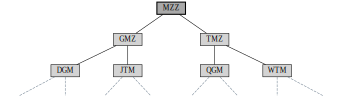

In [14]:
graphe_arbre(élagage(biblio, 3), largeur=12)

On redonne ici les fonctions `hauteur` et `taille`:

In [15]:
def hauteur(a):
    if a is None:
        return 0
    else:
        return 1 + max(hauteur(a.gauche), hauteur(a.droite))

In [16]:
def taille(a):
    if a is None:
        return 0
    else:
        return 1 + taille(a.gauche) + taille(a.droite)

In [17]:
hauteur(biblio)

15

In [18]:
taille(biblio)

17576

Ces deux derniers tests confirment notre étude théorique !

---
## Exercice 2

Donnez tous les ABR formés de 3 noeuds et contenant les entiers 1, 2 et 3.

**Réponse:** Il s'agit du même exercice que celui donné à la feuille de TP précédent: remplir un arbre à 3 noeuds de façon à ce qu'un parcours infixe affiche 1, 2 et 3 revient à construire un ABR (cette remarque avait été faite lors de la correction). Les 5 arbres sont donc les mêmes que ceux donnés plus tôt.

---
## Exercice 3

1. Dans un ABR, où se trouve le plus petit élément ?

Deux cas peuvent se produire:
* Le plus petit élément $x$ peut être à la racine de l'arbre s'il n'y a pas de fils à gauche: en effet, on sait que pour tout $y$ dans le sous-arbre à droite, on aura forcément $x \leqslant y$ par définition d'un ABR.
* S'il y a un sous-arbre à gauche, alors encore par définition d'un ABR, le plus petit élément s'y trouve forcément.

**Synthèse de ce raisonnement récursif:** Le minimum est donc le dernier élément trouvé en parcourant l'arbre uniquement en suivant les chemins vers la gauche.


2. En déduire une fonction `minimum(a)` qui renvoit le plus petit élément d'un ABR `a`. Si l'arbre est vide, la fonction renvoit `None`.

In [19]:
def minimum(a):
    if a is None:
        return None
    else:
        if a.gauche is None:
            # a EST le minimum
            return a.valeur
        else:
            return minimum(a.gauche)

In [20]:
minimum(biblio)

'AAA'

---
## Exercice 4

La fonction `insertion_ABR(x, a)` étudiée en classe ajoute systématiquement l'élement 'x' à l'arbre `a` même si celui-ci y est déjà.

In [21]:
def insertion_ABR(x, a):
    """
    Insère la nouvelle valeur x dans l'ABR dont la racine est a.
    """
    
    if a is None:
        return Noeud(x)
    else:
        v = a.valeur

        if x < v:
            # On insère x dans le sous-arbre à gauche
            nouveau_gauche = insertion_ABR(x, a.gauche)
            return Noeud(v, gauche=nouveau_gauche, droite=a.droite)
        else:
            # On insère x dans le sous-arbre à droite
            nouveau_droite = insertion_ABR(x, a.droite)
            return Noeud(v, gauche=a.gauche, droite=nouveau_droite)
        

Écrire une variante `insertion_unique_ABR(x, a)` qui n'ajoute pas l'élément `x` à `a` s'il s'y trouvait déjà.

**Première solution:** On commence par écrire une fonction `recherche_ABR` qui permet de savoir si une valeur est dans un ABR ou non:

In [22]:
def recherche_ABR(x, a):
    """
    Répond True ou False selon que x est dans l'ABR a ou non.
    """
    
    if a is None:
        return False
    else:
        if x == a.valeur:
            return True
        elif x < a.valeur:
            return recherche_ABR(x, a.gauche)
        else:
            # x > a.valeur, forcément
            return recherche_ABR(x, a.droite)

On peut alors combiner les deux fonctions ci-dessus pour répondre au cahier des charges de l'énoncé:

In [23]:
def insertion_unique_ABR(x, a):
    if recherche_ABR(x, a):
        # x est dans a
        return a
    else:
        # x n'est pas dans a
        return insertion_ABR(x, a)

On teste cette fonction en insérant des noeuds avec beaucoup de doublons dans un arbre:

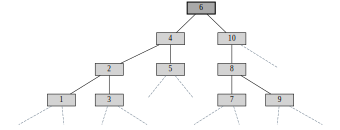

In [24]:
from random import randint
a = None
for i in range(100):
    a = insertion_unique_ABR(randint(1, 10), a)

display(graphe_arbre(a, largeur=12))

On constate que chaque chiffre s'y trouve au plus une fois (et la probabilité que l'un ne s'y trouve pas est extrêmement faible puisqu'on a fait 100 insertions).

**Solution sans utiliser recherche_ABR:**

On se propose de programmer les deux fonctions en une seule. Pour cela, à chaque étape on compare le nouveau sous-arbre à gauche (ou à droite) obtenu en y insérant l'élément x. Si cet arbre est inchangé par rapport à l'original, c'est que x était déjà présent, on ne change alors rien. Sinon, on procède comme pour la fonction d'insertion standard.

In [25]:
def insertion_unique_ABR(x, a):
    """
    Insère x dans l'ABR a, s'il ne s'y trouve pas déjà. 
    Renvoie un nouvel arbre en cas d'insertion. 
    Renvoie a si x est déjà dans a.
    """
    
    if a is None:
        return Noeud(x)
    else:
        v = a.valeur
        if x == v:
            return a
        elif x < v:
            # On insère x dans le sous-arbre à gauche
            nouveau_gauche = insertion_unique_ABR(x, a.gauche)
            if not (nouveau_gauche is a.gauche):
                # x n'était pas dans le sous-arbre gauche
                return Noeud(v, gauche=nouveau_gauche, droite=a.droite)
            else:
                # x était déjà dans le sous-arbre gauche
                return a
        else:
            # On insère x dans le sous-arbre à droite
            nouveau_droite = insertion_unique_ABR(x, a.droite)
            if not (nouveau_droite is a.droite):
                #  n'était pas dans le sous-arbre droit
                return Noeud(v, gauche=a.gauche, droite=nouveau_droite)
            else:
                return a

Le même test que plus haut:

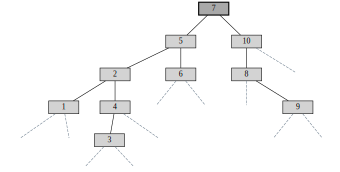

In [26]:
from random import randint
a = None
for i in range(100):
    a = insertion_unique_ABR(randint(1, 10), a)

display(graphe_arbre(a, largeur=12))

---
## Exercice 5

Écrire une fonction `compte_ABR(x, a)` qui compte le nombre d'occurences de la valeur `x` dans l'ABR `a`. On évitera d'explorer les sous-arbres dont on est certain qu'ils ne contiennent pas `x`: il ne s'agit pas d'écrire une fonction `compte(x, a)` qui serait adaptée à n'importe quel arbre binaire, de recherche ou non.

**Première version pour un arbre binaire quelconque:**

In [27]:
def compte(x, a):
    """
    Compte le nombre d'occurences de x dans l'arbre binaire a.
    """
    
    if a is None:
        return 0
    else:
        n = 0
        n += compte(x, a.gauche)
        n += compte(x, a.droite)
        if a.valeur == x:
            n += 1
        return n

**Deuxième version, optimisée pour les ABR:** On ne parcourt que les sous-arbre dans lesquels x a une chance d'apparaître:

In [28]:
def compte_ABR(x, a):
    """
    Compte le nombre d'occurences de x dans l'ABR a.
    N'explore que les sous-arbres pour lesquels
    la recherche de x peut éventuellement aboutir.
    """
    
    if a is None:
        return 0
    else:
        n = 0
        if x < a.valeur:
            n += compte(x, a.gauche)
        else:
            n += compte(x, a.droite)
            if a.valeur == x:
                n += 1
        return n

In [29]:
from time import time

print("Comptage avec la fonction 'compte' standard:")
début = time()
for i in range(1000):
    compte("CIA", biblio)
    if i % 100 == 0:
        print(".", end="")
fin = time()
print()
print(fin - début, "secondes.")

print("\n\nComptage avec 'compte_ABR':")
début = time()
for i in range(1000):
    compte_ABR("CIA", biblio)
    if i % 100 == 0:
        print(".", end="")
fin = time()
print()
print(fin - début, "secondes.")

Comptage avec la fonction 'compte' standard:
..........
4.8571765422821045 secondes.


Comptage avec 'compte_ABR':
..........
2.322385311126709 secondes.


---
## Exercice 6

1. Écrire une fonction `remplit_liste(a, t)` qui rajoute tous les éléments d'un arbre binaire `a` à une liste `t`, dans l'ordre infixe. On utilisera `t.append(x)` pour rajouter un élément `x` donné à `t`.

  La liste `t` est modifiée en place.

In [30]:
def remplit_liste(a, t):
    """
    Prend pour paramètre un arbre binaire a (pas forcément un ABR) et
    une liste t.
    
    Remplit (en la modifiant en place) la liste t avec les valeurs
    des noeuds de a en suivant un parcours infixe.
    
    Ne renvoit aucune valeur significative.
    """
    
    if a is None:
        pass
    else:
        remplit_liste(a.gauche, t)
        t.append(a.valeur) # parcours infixe, entre les 2 ss-arbres
        remplit_liste(a.droite, t)

In [31]:
t = []
remplit_liste(biblio, t)
len(t)

17576

2. Écrire une fonction `lister(a)` prenant pour paramètre un ABR `a` et renvoyant la liste de ses valeurs, dans l'ordre croissant.

In [32]:
def lister(a):
    """
    Renvoit la liste des valeurs de l'ABR a, dans l'ordre croissant.
    """
    
    t = []
    remplit_liste(a, t)
    return t

In [33]:
t = lister(biblio)
print(len(t))
t[0], t[-1]

17576


('AAA', 'ZZZ')

---
## Exercice 7

On se propose de réaliser une étude statistique sur l'insertion dans un ABR après avoir mélangé aléatoirement les éléments d'un tableau.

1. Ranger dans un ABR les nombres de 1 à 1000 après les avoir mélangés aléatoirement. Vous utiliserez (et implémenterez) pour cela le [mélange de Knuth](https://fr.wikipedia.org/wiki/M%C3%A9lange_de_Fisher-Yates).

In [34]:
from random import randint

def mélange(t):
    """
    Mélange en place les valeurs de t grâce à l'algorithme de Knuth.
    """
    
    n = len(t)
    i = n - 1
    while i >= 1:
        j = randint(0, i)
        t[i], t[j] = t[j], t[i]
        i -= 1

In [35]:
N = 1000 # Taille des échantillons
S = 100 # nombre de simulations

somme = 0
for _ in range(S):
    t = [i+1 for i in range(N)]
    mélange(t)

    a = None
    for v in t:
        a = insertion_ABR(v, a)
    assert taille(a) == N
    #graphe_arbre(élagage(a, 4), largeur=16)
    somme += hauteur(a)
print("Hauteur moyenne = {}".format(somme / S))

Hauteur moyenne = 22.08


2. Quelle est la hauteur de l'arbre obtenu ?

On sait que $2^{10} = 1024 \approx 1000$ et on constate que le résultat obtenu est environ $2,2\times 10$:

In [36]:
10*2.2

22.0

3. Répétez l'expériences précédente un grand nombre de fois, et calculez la hauteur moyenne de l'arbre obtenu. Comparez ce nombre à $\log_2(1000)$.

On a déjà fait cela pour la question précédente...

4. Quelle conjecture peut-on émettre sur la hauteur moyenne d'un ABR construit après un mélange aléatoire, en fonction du nombre $N$ de valeurs ?

On peut conjecturer que la hauteur moyenne de l'arbre est environ $2,2\times \log_2{N}$

5. Vérifiez cette conjecture avec d'autres valeurs de $N$.

---
## Exercice 8

À partir du fichier `mots.txt`, construire un ABR contenant les mots de la langue française en vous inspirant de l'exercice précédent. Quelle est la hauteur moyenne de cet arbre ?

In [37]:
with open("mots.txt") as f:
    mots = []
    for mot in f:
        mots.append(mot)
len(mots)

175693

In [38]:
mélange(mots)
a = None
for m in mots:
    a = insertion_ABR(m, a)
print("Nombre de mots:", len(mots))
print("Taille de l'arbre:", taille(a))
print("Hauteur de l'arbre rempli aléatoirement", hauteur(a))
print("2.2*log2(nombre de mots) =", 2.2*log2(len(mots)))

Nombre de mots: 175693
Taille de l'arbre: 175693
Hauteur de l'arbre rempli aléatoirement 41
2.2*log2(nombre de mots) = 38.32993381084564


La conjecture ne semble pas très précisément vérifiée ici, mais l'ordre de grandeur reste bon.

---
## Exercice 9

Utiliser l'exercice précédent pour écrire une fonction `trier(t)` qui prend pour paramètre un tableau d'éléments comparables, et renvoie un nouveau tableau, trié.

On utilise l'algorithme suivant:
* On part d'un arbre vide;
* On remplit l'arbre avec la fonction `insertion_ABR(x, a)` pour tous les éléments `x` de `t`;
* On utilise la fonction `lister(a)` pour créer le tableau trié.

1. Implémentez la fonction `trier(t)`

In [39]:
def trier(t):
    """
    Trie les valeurs du tableau t. Renvoit une copie triée.
    """
    
    a = None
    for v in t:
        a = insertion_ABR(v, a)
        
    return lister(a)

In [40]:
t = [randint(1, 10) for _ in range(20)]
print(t)
print(trier(t))

[5, 7, 9, 4, 4, 2, 10, 9, 3, 3, 4, 2, 8, 5, 9, 10, 6, 10, 6, 2]
[2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 8, 9, 9, 9, 10, 10, 10]


2. Quelle est la complexité de cette fonction ?

**Réponse:** Dans le pire des cas, si la liste est déjà triée, l'arbre créé sera un peigne à droite. Créer ce peigne prend $1 + 2 + \cdot s + N$ opérations, car chaque insertion prendra une étape de plus que la précédente.

On a déjà vu que cette somme vaut approximativement $\frac12N^2$ lorsque $N$ est grand, ce qui fait de cet algorithme un algorithme quadratique, tout comme les tris par insertion et sélection étudiés en Première.

Par contre, il est probable que, lorsque la liste est bien mélangée, la complexité soit bien moindre.

3. On aimerait améliorer la complexité en moyenne de la fonction `trier`, en rajoutant une étape préliminaire: on mélange aléatoirement les éléments du tableau initial `t` avant de l'insérer dans l'arbre.

---
## Exercice 10

1. Écrire une fonction `supprimer_minimum(a)` qui prend pour paramètre un ABR `a` **supposé non vide** et supprime son élément minimum. La fonction procède récursivement:
  * Si l'élément minimum est la racine de `a`, il suffit de renvoyer le sous-arbre à droite;
  * Sinon, on supprime l'élément minimum du sous-arbre à gauche.
  
Cette fonction renvoie l'arbre privé de son minimum m, ainsi que ce minimum m.

In [41]:
def supprimer_minimum(a):
    if a.gauche is None:
        return a.droite, a.valeur
    else:
        nouveau_gauche, m = supprimer_minimum(a.gauche)
        return Noeud(a.valeur, nouveau_gauche, a.droite), m

Pour tester cette fonction, on crée un arbre aléatoire, et on supprime son minimum tant qu'il n'est pas vide. Vérifier de visu que la suppression est correcte à chaque étape !

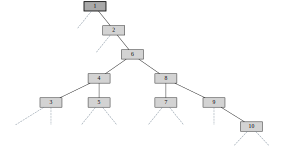



Suppression du minimum 1:



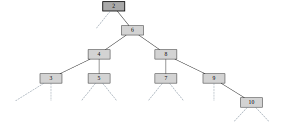



Suppression du minimum 2:



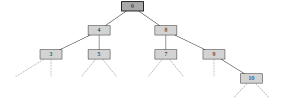



Suppression du minimum 3:



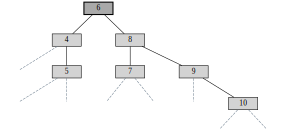



Suppression du minimum 4:



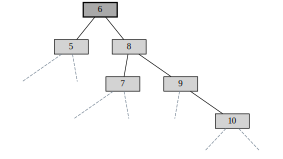



Suppression du minimum 5:



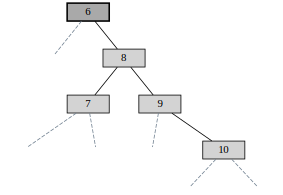



Suppression du minimum 6:



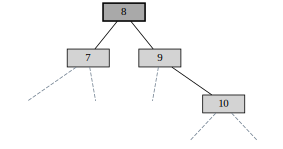



Suppression du minimum 7:



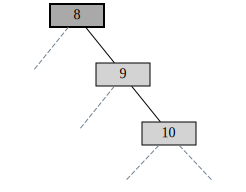



Suppression du minimum 8:



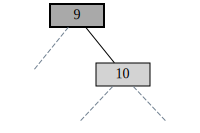



Suppression du minimum 9:



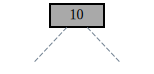



Suppression du minimum 10:



In [42]:
from random import randint
a = None
for i in range(100):
    a = insertion_unique_ABR(randint(1, 10), a)

display(graphe_arbre(a, largeur=10))

while taille(a) > 0:
    a, m = supprimer_minimum(a)
    print("\n\nSuppression du minimum {}:\n".format(m))
    display(graphe_arbre(a, largeur=10))

2. En déduire une fonction `supprimer(x, a)` qui supprime l'élément `x` d'un ABR `a`. On déclenche une erreur si cet élément n'est pas dans `a`. On procède récursivement comme suit:
  * Si l'élément `x` n'est pas la racine de `a`, on supprime `x` du sous-arbre à gauche ou à droite (selon le cas);
  * Si l'élément `x` est la racine de `a`:
    * Si un des deux sous-arbres est vide, il suffit de renvoyer l'autre;
    * Sinon, on supprime l'élément minimum `m` du sous-arbre à droite de `a`, et on crée un nouvel arbre dont la racine est cet élément minimum `m`, le sous-arbre à gauche est l'ancien sous-arbre à gauche et le sous-arbre à droite est l'ancien sous-arbre à droite privé de `m`.

In [43]:
def supprimer(x, a):
    if a is None:
        raise IndexError("L'élément n'est pas dans l'arbre")
    else:
        y = a.valeur
        
        if x < y:
            # x se trouve (éventuellement) dans le sous-arbre gauche
            nouveau_gauche = supprimer(x, a.gauche)
            return Noeud(y, nouveau_gauche, a.droite)
        elif x > y:
            # x se trouve (éventuellement) dans le sous-arbre droit
            nouveau_droite = supprimer(x, a.droite)
            return Noeud(y, a.gauche, nouveau_droite)
        else:
            # x == y
            if a.droite is None:
                return a.gauche
            elif a.gauche is None:
                return a.droite
            else:
                nouveau_droite, m = supprimer_minimum(a.droite)
                return Noeud(m, a.gauche, nouveau_droite)

Pour tester, on supprime cette fois systématiquement la valeur à la racine de l'arbre, afin de tester le cas le plus complexe.

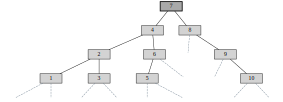



Suppression de la valeur 7:



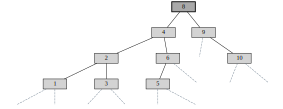



Suppression de la valeur 8:



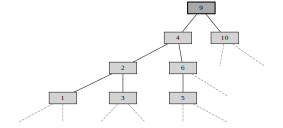



Suppression de la valeur 9:



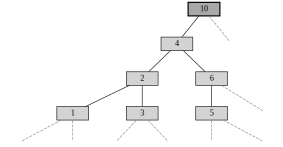



Suppression de la valeur 10:



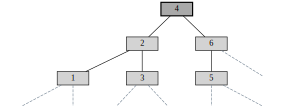



Suppression de la valeur 4:



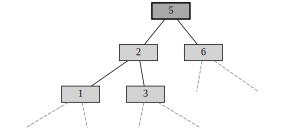



Suppression de la valeur 5:



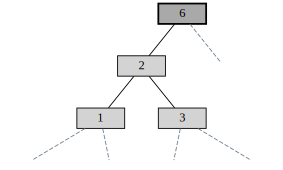



Suppression de la valeur 6:



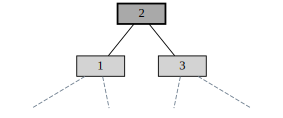



Suppression de la valeur 2:



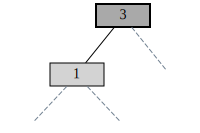



Suppression de la valeur 3:



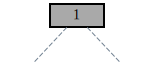



Suppression de la valeur 1:



In [44]:
from random import randint
a = None
for i in range(100):
    a = insertion_unique_ABR(randint(1, 10), a)

display(graphe_arbre(a, largeur=10))

while taille(a) > 0:
    v = a.valeur
    a = supprimer(v, a) 
    print("\n\nSuppression de la valeur {}:\n".format(v))
    display(graphe_arbre(a, largeur=10))